In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay

In [19]:
data=pd.read_csv("data/Machines.csv")

In [20]:
data.head()

,RPM,Load_pct,Temp_C,Vibration_RMS,Pressure_kPa,Current_A,Acoustic_dB,OilParticles_cnt,Failure
0,1826.2,52.93,29.51,1.648,254.58,9.982,67.42,84.2,0
1,1490.0,83.49,35.36,1.966,285.32,12.390,67.38,73.8,0
2,1937.6,26.79,33.01,1.458,225.16,9.139,63.28,37.0,1
3,1985.1,64.44,28.34,1.706,256.85,12.471,64.91,90.1,0
4,1262.2,84.16,32.97,2.499,300.12,12.514,65.51,93.5,1


In [21]:
data.shape

(600, 9)

In [22]:
data.columns

Index(['RPM', 'Load_pct', 'Temp_C', 'Vibration_RMS', 'Pressure_kPa',
       'Current_A', 'Acoustic_dB', 'OilParticles_cnt', 'Failure'],
      dtype='object')

In [23]:
data.describe()

,RPM,Load_pct,Temp_C,Vibration_RMS,Pressure_kPa,Current_A,Acoustic_dB,OilParticles_cnt,Failure
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1743.460167,59.732900,28.098067,1.854540,251.987750,10.755880,64.210817,81.900167,0.320000
std,243.450136,23.449036,6.726169,0.389966,28.797646,1.964418,3.041459,14.299652,0.466865
min,1008.900000,20.040000,10.000000,0.988000,186.150000,6.633000,55.210000,37.000000,0.000000
25%,1575.525000,39.467500,23.547500,1.537000,227.047500,9.158250,61.945000,72.475000,0.000000
50%,1744.650000,59.175000,27.925000,1.867000,251.440000,10.662000,64.235000,81.650000,0.000000
75%,1896.875000,80.212500,32.507500,2.163000,276.402500,12.428500,66.495000,91.600000,1.000000
max,2478.500000,99.950000,46.500000,2.948000,318.000000,14.824000,72.370000,129.000000,1.000000


In [11]:
data['Failure'].value_counts()

Failure
0    408
1    192
Name: count, dtype: int64

### ¿El conjunto de datos está balanceado o desbalanceado? 
**Sí**

variables predictoras:

In [24]:
X=data.iloc[:,0:8]
X.head()

,RPM,Load_pct,Temp_C,Vibration_RMS,Pressure_kPa,Current_A,Acoustic_dB,OilParticles_cnt
0,1826.2,52.93,29.51,1.648,254.58,9.982,67.42,84.2
1,1490.0,83.49,35.36,1.966,285.32,12.390,67.38,73.8
2,1937.6,26.79,33.01,1.458,225.16,9.139,63.28,37.0
3,1985.1,64.44,28.34,1.706,256.85,12.471,64.91,90.1
4,1262.2,84.16,32.97,2.499,300.12,12.514,65.51,93.5


In [25]:
Y=data.iloc[:,8]
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Failure, dtype: int64

Dividiendo el conjunto en 80-20 estratificando:

In [26]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42,stratify=Y)

Estandarizando variable predictora:

In [27]:
scaler=StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)

In [29]:
X_test_scaled=scaler.transform(X_test)

SVM

In [30]:
svm=SVC(kernel="rbf", C=1.0,gamma="scale", random_state=42)

In [31]:
svm.fit(X_train_scaled,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
svm_score=svm.score(X_test_scaled,Y_test)
print(f"Accuracy: {svm_score}")

Accuracy: 0.9166666666666666


In [33]:
svm_pred=svm.predict(X_test_scaled)

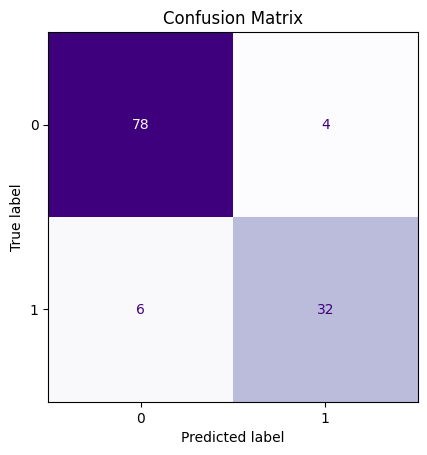

In [38]:
cm = confusion_matrix(Y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(Y_test, svm_pred, target_names=["0-no Falla", "1-si Falla"], digits=3))

              precision    recall  f1-score   support

  0-no Falla      0.929     0.951     0.940        82
  1-si Falla      0.889     0.842     0.865        38

    accuracy                          0.917       120
   macro avg      0.909     0.897     0.902       120
weighted avg      0.916     0.917     0.916       120



Arbol

In [41]:
tree = DecisionTreeClassifier(random_state=42)

In [42]:
tree.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
tree_score=tree.score(X_test, Y_test)
print("Accuracy:", tree_score)

Accuracy: 0.875


In [44]:
tree_pred = tree.predict(X_test)

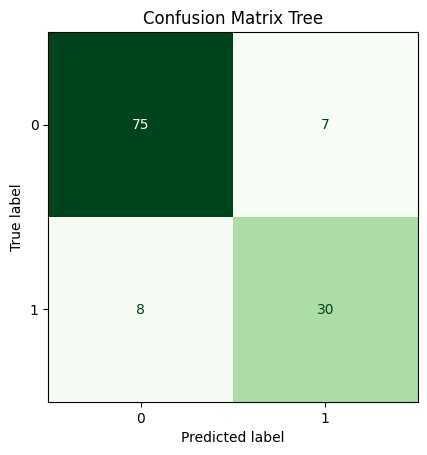

In [45]:
cm = confusion_matrix(Y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", colorbar=False)
plt.title("Confusion Matrix Tree")
plt.show()

In [46]:
print(classification_report(Y_test, svm_pred, target_names=["0-no Falla", "1-si Falla"], digits=3))

              precision    recall  f1-score   support

  0-no Falla      0.929     0.951     0.940        82
  1-si Falla      0.889     0.842     0.865        38

    accuracy                          0.917       120
   macro avg      0.909     0.897     0.902       120
weighted avg      0.916     0.917     0.916       120



In [47]:
def resumen_metricas(y_true, y_pred):
    r = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Accuracy": r["accuracy"],
        "Precision": r["1"]["precision"],
        "Recall": r["1"]["recall"],
        "F1-score": r["1"]["f1-score"]
    }

In [48]:
svm_metrics = resumen_metricas(Y_test, svm_pred)
tree_metrics = resumen_metricas(Y_test, tree_pred)
comparacion = pd.DataFrame(
    [svm_metrics, tree_metrics],
    index=["SVM", "Árbol"]
    )
comparacion.round(3)

,Accuracy,Precision,Recall,F1-score
SVM,0.917,0.889,0.842,0.865
Árbol,0.875,0.811,0.789,0.800


### Mejor modelo:
* Ambos modelos presentan un accuracy alto; sin embargo, esto sugiere que aún pueden requerir ajustes. En teoría, el modelo SVM debería ofrecer un mejor desempeño.

### ¿Qué métrica considera más importante y qué tipo de error es más grave? 
*Recall* es mejor detectar que va a fallar y que no falle